# A Step-by-Step Tutorial on the NAND Function Approximation Using a Bipolar Perceptron - CODE
Hey there! My name is Mario, I'm a Bioinformatics student at the University of Málaga, diving into the world of neural networks.
In this Jupyter notebook, I'm showcasing a perceptron's journey to learn the NAND gate - a classic logic gate
essential in computing. You'll see a perceptron model start from scratch, grapple with binary logic, and
evolve to accurately model the NAND function. Enjoy the visualization of its learning process!


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from google.colab import drive

## Function to implement: NAND gate

The NAND (NOT AND) function is a fundamental building block in digital electronics and computing. It's considered a universal gate because any boolean function can be implemented using just NAND operations. The NAND gate returns a false value only if all its inputs are true; otherwise, it returns true.

Here's a truth table for a two-input NAND gate:

| Input A | Input B | Output |
|---------|---------|--------|
|    0    |    0    |    1   |
|    0    |    1    |    1   |
|    1    |    0    |    1   |
|    1    |    1    |    0   |

The output column represents the result of applying the NAND operation to inputs A and B. As you can see, the only combination of inputs that will produce an output of 0 (false) is when both inputs are 1 (true).

To design a perceptron that acts as a NAND gate, you would aim to find weights \(w_1, w_2\) and bias \(b\) such that the decision boundary separates the input space into two regions: one where the output is -1 (representing a logical value of 0) and the other where the output is 1 (representing a logical value of 1). Because the perceptron outputs are bipolar (\{-1, 1\}), you would train it such that for input pairs \((0,0), (0,1),\) and \((1,0)\), the perceptron outputs 1, and for input pair \((1,1)\) it outputs -1.

Using the sign activation function, the perceptron's output for a given input pair \((x_1, x_2)\) is defined as:

$$
\text{output} = \text{sign}(w_1 \cdot x_1 + w_2 \cdot x_2 + b)
$$

Where the sign function can be defined as:

$$
\text{sign}(x) = \begin{cases}
  -1 & \text{if } x < 0 \\
  1 & \text{otherwise}
\end{cases}
$$

In the case of bipolar inputs where the true and false values are represented as 1 and -1, respectively, you will have to adjust the inputs and outputs accordingly to fit this scheme for the truth table while training the perceptron. Once the perceptron is trained correctly, the weights and bias will represent a line (decision boundary) in the 2D plane of $x_1$ and $x_2$ that separates the points that should output 1 from those that should output -1, consistent with the NAND logic.

The perceptron learning rule for weight (w) and bias (b) update is typically as follows, where \(y\) is the expected output, and $\hat{y}$ is the perceptron's current output for the given inputs:

$$
w_i(new) = w_i(old) + \Delta w_i = w_i(old) + \eta \cdot (y - \hat{y}) \cdot x_i
$$
$$
b(new) = b(old) + \Delta b = b(old) + \eta \cdot (y - \hat{y})
$$

Where \(\eta\) is the learning rate, a small positive value that determines the size of the weight updates.


In [ ]:
# Bipolar inputs (where "0" is -1 and "1" is 1)
inputs = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# NAND outputs in bipolar form (where "0" output is -1 and "1" output is 1)
# For a NAND, the output is -1 only if both inputs are 1.
outputs = [1, 1, 1, -1]

# Create the pandas DataFrame
NAND = pd.DataFrame(inputs, columns=['Input A', 'Input B'])
NAND['Output'] = outputs
NAND

,Input A,Input B,Output
0,-1,-1,1
1,-1,1,1
2,1,-1,1
3,1,1,-1


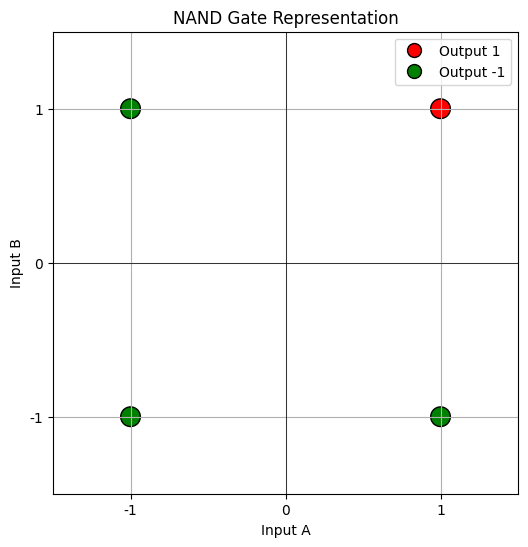

In [51]:
# Plotting
plt.figure(figsize=(6,6))
colors = ['red' if output == -1 else 'green' for output in NAND['Output']]
plt.scatter(NAND['Input A'], NAND['Input B'], c=colors, s=200, marker='o', edgecolors='k')

# Formatting the plot
plt.title("NAND Gate Representation")
plt.xlabel("Input A")
plt.ylabel("Input B")
plt.xticks(ticks=[-1, 0, 1], labels=['-1', '0', '1'])
plt.yticks(ticks=[-1, 0, 1], labels=['-1', '0', '1'])
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Adding legend
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Output 1', markersize=10, markerfacecolor='red', markeredgecolor='k')
green_patch = plt.Line2D([0], [0], marker='o', color='w', label='Output -1', markersize=10, markerfacecolor='green', markeredgecolor='k')
plt.legend(handles=[red_patch, green_patch])

# Show the plot
plt.show()

## How will the perceptron react to this data?

In addressing the interaction of a single-layer perceptron with the provided NAND gate data, the process would typically involve the following steps and considerations:

1. **Initialization of Parameters:**
   The perceptron starts with random initialization of the weights and bias. Given that your perceptron should work with bipolar inputs and outputs, the initial weights and bias can be set to small random values around zero.

2. **Feedforward:**
   For each training example, the perceptron sums the weighted inputs and the bias. The perceptron has two inputs for each example, corresponding to the two inputs of the NAND operation.

3. **Activation:**
   The summed value is passed through an activation function to produce the perceptron's output. For the bipolar perceptron, the activation function is the sign function, which outputs `1` if the sum is non-negative and `-1` if it's negative. This step determines which side of the decision boundary the inputs lie on based on the current weights and bias.

4. **Learning Algorithm - Weight Update:**
   The perceptron compares its output with the expected output (target value) from the NAND truth table. If there's a discrepancy, it updates its weights and bias according to the perceptron learning rule. This rule adjusts the weights in the direction that would reduce the error, making the decision boundary gradually converge to a state that correctly classifies all training examples.

5. **Iteration:**
   This process repeats for many iterations (epochs) over the training dataset. In each epoch, all the training examples are processed, and the weights and bias are updated.

6. **Convergence:**
   Ideally, after sufficient training, the weights and bias will reach values such that the perceptron will correctly output `1` for the input pairs `(-1, -1)`, `(-1, 1)`, and `(1, -1)`, and `-1` for the input pair `(1, 1)`. At this point, the perceptron has learned the NAND function.


**NOTE**: When executing this cell bellow, which encapsulates all the code related to the perceptron prediction, this error: `AttributeError: 'list' object has no attribute 'ListedColormap'` might pop up, if this happens, reaload all the libraries and run the cell again. The `colors` module from `matplotlib` often gives some trouble in Google Collab.

Input data for iteration 0: [-1 -1]
Expected output for iteration 0: 1
Output of the single neuron (pre-activation function): [0.00477454]
Output post-activation function: [1.]


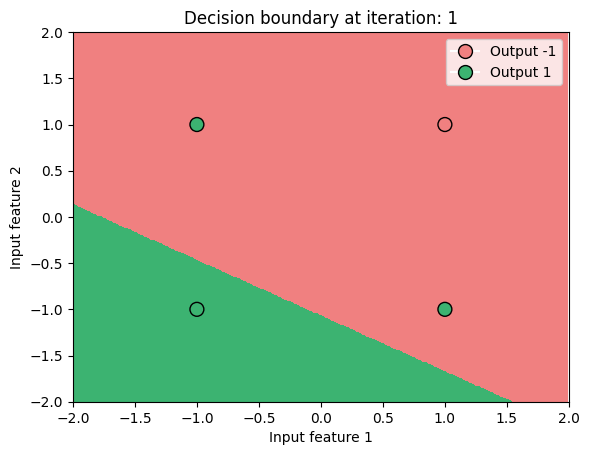

Input data for iteration 1: [-1  1]
Expected output for iteration 1: 1
Output of the single neuron (pre-activation function): [-0.01304452]
Output post-activation function: [-1.]
Output ([-1.]) did not match expected output (1)
Updating weights and bias...
New weights: w_old + (0.01 * (1 - [-1.]) * [-1  1])
New bias: b_old + (0.01 * 1 - [-1.])


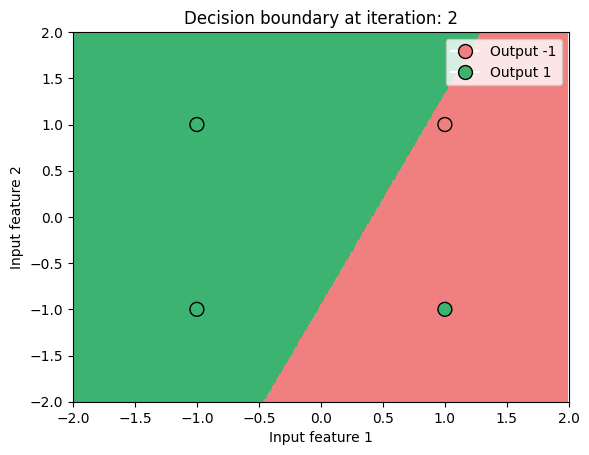

Input data for iteration 2: [ 1 -1]
Expected output for iteration 2: 1
Output of the single neuron (pre-activation function): [-0.02596834]
Output post-activation function: [-1.]
Output ([-1.]) did not match expected output (1)
Updating weights and bias...
New weights: w_old + (0.01 * (1 - [-1.]) * [ 1 -1])
New bias: b_old + (0.01 * 1 - [-1.])


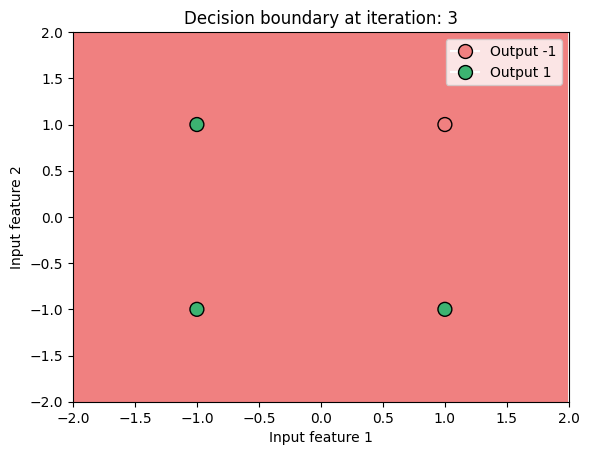

Input data for iteration 3: [1 1]
Expected output for iteration 3: -1
Output of the single neuron (pre-activation function): [0.0162126]
Output post-activation function: [1.]
Output ([1.]) did not match expected output (-1)
Updating weights and bias...
New weights: w_old + (0.01 * (-1 - [1.]) * [1 1])
New bias: b_old + (0.01 * -1 - [1.])


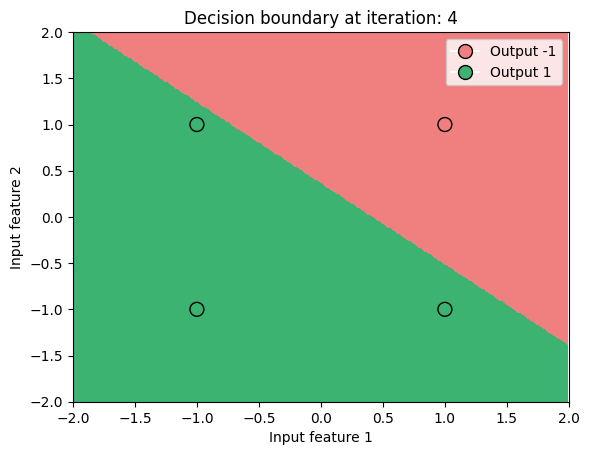

In [73]:
# Activation function (sign function)
def sign_activation(x):
    """
    Activation function that returns -1 for negative input and 1 for non-negative.
    """
    return np.where(x >= 0, 1, -1)

# Perceptron training function
def train_perceptron(X, y, learning_rate=0.1):
    """
    Train a perceptron model given input data X and target labels y.
    """
    # Initialize weights and bias
    weights = np.array([-0.00537144, -0.00890953])  # Small random weights
    bias = np.array([-0.00950643])      # Small random bias


    # For storing weight and bias history for visualization
    weight_history = []
    bias_history = []


    for i in range(len(X)):
      # Calculate the input to the activation function
      input = np.dot(X[i], weights) + bias

      # Apply the sign activation function
      output = sign_activation(input)
      print(f'================================================================')
      print(f'Input data for iteration {i}: {X[i]}')
      print(f'Expected output for iteration {i}: {y[i]}')
      print(f'Output of the single neuron (pre-activation function): {input}')
      print(f'Output post-activation function: {output}')
      # Update the weights and bias if the output doesn't match the target
      if y[i] * output != 1:
        print(f'Output ({output}) did not match expected output ({y[i]})')
        print(f'Updating weights and bias...')
        weights += learning_rate * (y[i] - output) * X[i]
        bias += learning_rate * (y[i] - output)
        print(f'New weights: w_old + ({learning_rate} * ({y[i]} - {output}) * {X[i]})')
        print(f'New bias: b_old + ({learning_rate} * {y[i]} - {output})')
      print(f'================================================================')
      # Store weights and bias after each iteration for visualization
      weight_history.append(weights.copy())
      bias_history.append(bias.copy())
      # Plot the current decision boundary
      plot_decision_boundary(X, y, weights, bias, i)

    return weights, bias, weight_history, bias_history

def plot_decision_boundary(X, y, weights, bias, iteration):
    """
    Plot the decision boundary and data points for each iteration.
    """
    # Define the range of the grid
    x1_min, x1_max = -2, 2
    x2_min, x2_max = -2, 2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))

    # Flatten the grid to pass into perceptron
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    zz = np.sign(np.dot(grid, weights) + bias).reshape(xx1.shape)

    # Create a colormap for the filled contour
    cmap = colors.ListedColormap(['lightcoral', 'mediumseagreen'])

    # Plot the decision boundary using pcolormesh
    plt.pcolormesh(xx1, xx2, zz.astype(float), cmap=cmap, shading='auto')

    # Generate color for each point based on the class
    clrs = ['lightcoral' if y_i == -1 else 'mediumseagreen' for y_i in y]

    # Plot training examples with appropriate colors
    plt.scatter(X[:, 0], X[:, 1], c=clrs, marker='o', s=100, edgecolor='k', label='Data')

    # Additional plot formatting
    plt.title(f'Decision boundary at iteration: {iteration+1}')
    plt.xlabel('Input feature 1')
    plt.ylabel('Input feature 2')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    # Adding legend
    red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Output -1', markersize=10, markerfacecolor='lightcoral', markeredgecolor='k')
    green_patch = plt.Line2D([0], [0], marker='o', color='w', label='Output 1', markersize=10, markerfacecolor='mediumseagreen', markeredgecolor='k')
    plt.legend(handles=[red_patch, green_patch])
    plt.show()

inputs = NAND.loc[:, ['Input A', 'Input B']].values
outputs =  NAND['Output']

weights, bias, weight_history, bias_history = train_perceptron(inputs, outputs, learning_rate=0.01)


This initial weights and biases are cool!!

```
Initial weights: [-0.00537144 -0.00890953]
Initial bias: [-0.00950643]
Learning rate: 0.01
```

### Function Inputs:
- `X`: The input dataset, where each row is an example with two input features (in the context of your project, the inputs to the NAND gate).
- `y`: The target labels for each example in the dataset. For the NAND gate, these would be the expected outputs for each input combination.
- `learning_rate`: The step size used to update the weights during training. A larger learning rate makes the weights change more drastically with each update, while a smaller one leads to finer adjustments.
- `epochs`: The number of times to run the training process over the entire dataset.

### Training Process (Inside the Function):
1. **Weights and Bias Initialization:**
   - Initialize the perceptron weights with small random values close to zero. This is important to break symmetry and allows for the learning process to begin.
   - Initialize the bias with a similar small random value.

2. **History Variables:**
   - `weight_history` and `bias_history` are initialized as empty lists to record the evolution of weights and bias after each epoch for later analysis and visualization.

3. **Training Loop:**
   - The outer loop runs over the specified number of epochs.
   - The inner loop iterates over each example in the input dataset `X`.

4. **Activation Calculation:**
   - For each example, the weighted sum of inputs plus the bias term is computed (`np.dot(X[i], weights) + bias`). This sum represents the input to the activation function.

5. **Apply Activation Function:**
   - The activation function (`sign_activation`) is applied to the weighted sum to compute the output of the perceptron. The result is either `-1` or `1`, since we're using a bipolar neuron model.

6. **Perceptron Learning Rule:**
   - The perceptron learning rule checks if the predicted output matches the expected output (`y[i]`). If there is a mismatch (`y[i] * output != 1`), the weights and bias are updated:
     - `weights` are updated by adding `learning_rate * y[i] * X[i]`. This step moves the weight in the correct direction to reduce future errors.
     - `bias` is updated by adding `learning_rate * y[i]`. Since the bias acts as a weight for a constant input of 1, this update is similar to how weights are adjusted but without being multiplied by an input value (as bias is independent of input).
     
The mismatch condition `if y[i] * output != 1:` comes from the specific way the perceptron learning algorithm is traditionally formulated for bipolar inputs and outputs. Here's the reasoning behind it:

For a perceptron with bipolar inputs and outputs, the update condition checks whether the predicted output and the actual output have the same sign. In bipolar mode, valid outputs are `-1` and `1`. Multiplying the actual output `y[i]` by the predicted output `output` should give `1` if both are the same since `1 * 1 = 1` and `-1 * -1 = 1`. If one is `-1` and the other is `1`, the multiplication would result in `-1`, indicating a mismatch.

So, the condition `if y[i] * output != 1:` effectively checks whether the predicted output is the same as the actual output in terms of sign, which corresponds to correctness in classification. If this condition is not satisfied, it means the perceptron has made an error in prediction, necessitating an update to the weights and bias.

The update rule then follows with the term `y[i] * X[i]`. Since `y[i]` is the correct output, multiplying it by the input `X[i]` and the learning rate `learning_rate` then adding it to the current weight `weights` adjusts the weight in the direction that would correct the error. The bias is updated similarly, by adding the product of the learning rate and the output discrepancy `y[i]` to the current bias `bias`.


7. **Record Keeping:**
   - After updating weights and bias, their values are appended to `weight_history` and `bias_history`.

8. **Visualization:**
   - After each epoch, the `plot_decision_boundary` function is called to visualize the decision boundary with the current weights and bias.


### Perceptron convergence

In order to explore if the perceptron converged, we will plot the variation of the loss function when running the perceptron algorithm various times over the same dataset with the same initial conditions.

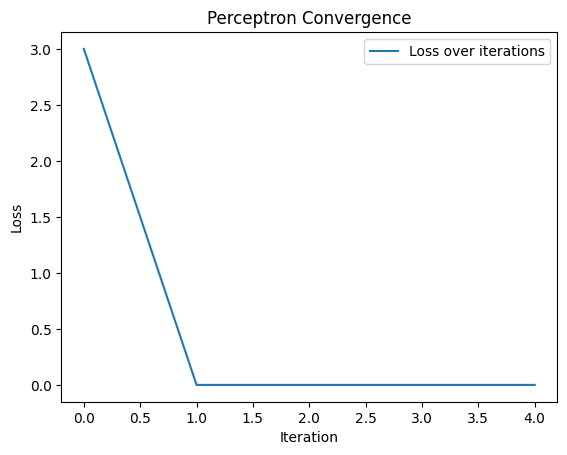

In [62]:
def train_perceptronv2(X, y, learning_rate=0.1, epochs=20):
    """
    Train a perceptron model given input data X and target labels y.
    """
    # Initialize weights and bias
    weights = np.array([-0.00537144, -0.00890953])  # Given initial weights
    bias = np.array([-0.00950643])  # Given initial bias

    # For storing weight, bias history, and loss values for visualization
    weight_history = []
    bias_history = []
    loss_history = []

    for epoch in range(epochs):
        total_loss = 0  # Reset total loss for each epoch
        for i in range(len(X)):
            # Calculate the input to the activation function
            input = np.dot(X[i], weights) + bias

            # Apply the sign activation function
            output = np.sign(input)

            # Calculate loss (Mean Squared Error)
            loss = (y[i] - output)**2
            total_loss += loss

            # Update the weights and bias if the output doesn't match the target
            if y[i] * output != 1:
                weights += learning_rate * (y[i] - output) * X[i]
                bias += learning_rate * (y[i] - output)

            # Store weights and bias after each iteration for visualization
            weight_history.append(weights.copy())
            bias_history.append(bias.copy())

        # Store average loss for this epoch
        average_loss = total_loss / len(X)
        loss_history.append(average_loss)

    # After training, plot the loss over iterations
    plt.plot(loss_history, label='Loss over iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Perceptron Convergence')
    plt.legend()
    plt.show()

    return weights, bias, weight_history, bias_history, loss_history

weights, bias, weight_history, bias_history, loss_history = train_perceptronv2(inputs, outputs, learning_rate=0.01, epochs=5)


### Last comment
Hey everyone, thanks for taking the time to check out this notebook! If you found this dive into perceptron learning and NAND gate classification interesting, feel free to explore other projects and code snippets I've worked on. There's a mix of stuff out there – some of it might just spark your curiosity or help you out in your own machine learning adventures. Happy coding, and stay curious!

https://github.com/Mawio02?tab=repositories